In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
# from fpp import *
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import time

In [2]:
def convertClassToOneHot(label):
    # pass
    labelSize = len(np.unique(label))
    f = np.zeros((len(label), labelSize))
    for index, l in enumerate(label):
        f[index, l] = 1.0
    return f

def convertOneHotToLabel(f):
    return np.array([np.where(r==1)[0][0] for r in f])

In [3]:
X = np.load('data/circle_cloud_10D.npy')

In [7]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
x_embedding = pca.transform(X)
print(pca.components_)

[[-0.47179591 -0.331522    0.46483909 -0.23613547 -0.17696091  0.14567497
   0.21108052 -0.06375441  0.50549145  0.19745598]
 [ 0.62850417 -0.24997688 -0.00809672 -0.18920766 -0.30874998  0.1708356
   0.22678431 -0.37257697  0.19577791 -0.39184678]]


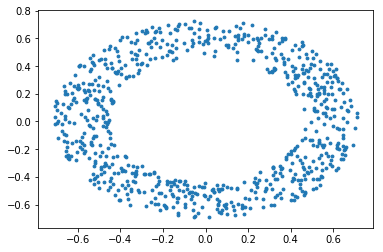

In [12]:
plt.scatter(x_embedding[:,0], x_embedding[:,1], s=8)

In [36]:
from MI_fpp import fpp
import numpy as np
X = np.load('data/circle_cloud_10D.npy').astype('float32')
model = fpp(printOutput= True)
model.setupPointCloud(X)
model.trainPointCloud()

C:\Users\shusenl\Anaconda3\envs\py37\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


total step size: 292
step 0 mutual information estimation: -0.00
step 50 mutual information estimation: inf
step 100 mutual information estimation: inf
step 150 mutual information estimation: inf
step 200 mutual information estimation: inf
step 250 mutual information estimation: inf
step 291 mutual information estimation: inf


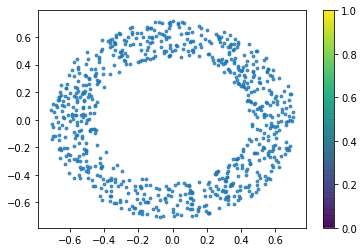

In [38]:
embed = np.array(np.mat(X)*model.projMat)
import matplotlib.pyplot as plt
plt.scatter(embed[:,0], embed[:,1], cmap="Spectral", alpha=0.8, s=8)

In [31]:
import numpy as np
data = np.load("data/threePeaks_5D.npy")
X = data[:, :-1]
f = data[:,-1]

total step size: 1500


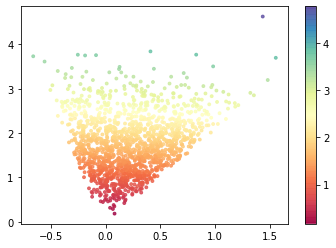

In [28]:
from MI_fpp import fpp
model = fpp()
model.setup(X, f, degree=3)
model.train(50, 50) 
proj_mat, embedding, loss, R2 = model.eval()
plt.scatter(embedding[:,0], embedding[:,1], c=f, cmap="Spectral", alpha=0.8, s=8)
plt.colorbar()

C:\Users\shusenl\Anaconda3\envs\py37\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


total step size: 900


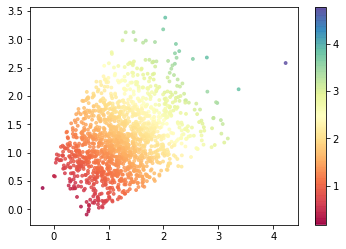

In [30]:
from MI_fpp import fpp
model = fpp()
model.setup(X, f, degree=3, MI_regu=True, MI_weight=0.00001)
model.train(30, 50) 
proj_mat, embedding, loss, R2 = model.eval()
plt.scatter(embedding[:,0], embedding[:,1], c=f, cmap="Spectral", alpha=0.8, s=8)
plt.colorbar()

C:\Users\shusenl\Anaconda3\envs\py37\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


total step size: 900


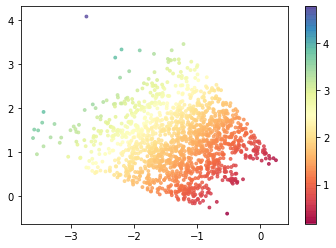

In [29]:
from MI_fpp import fpp
model = fpp()
model.setup(X, f, degree=3, MI_regu=True, MI_weight=1.0)
model.train(30, 50) 
proj_mat, embedding, loss, R2 = model.eval()
plt.scatter(embedding[:,0], embedding[:,1], c=f, cmap="Spectral", alpha=0.8, s=8)
plt.colorbar()

C:\Users\shusenl\Anaconda3\envs\py37\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


total step size: 900


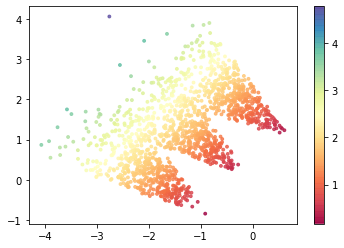

In [21]:
from MI_fpp import fpp
model = fpp()
model.setup(X, f, degree=3, MI_regu=True, MI_weight=2.0)
model.train(30, 50) 
proj_mat, embedding, loss, R2 = model.eval()
plt.scatter(embedding[:,0], embedding[:,1], c=f, cmap="Spectral", alpha=0.8, s=8)
plt.colorbar()

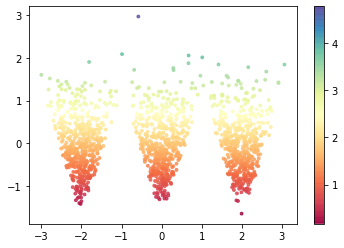

In [32]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
x_embedding = pca.transform(X)
import matplotlib.pyplot as plt
plt.scatter(x_embedding[:,0], x_embedding[:,1], c=f, cmap="Spectral", alpha=0.8, s=8)
plt.colorbar()